In [ ]:
from cycler import cycler
import matplotlib.pyplot as plt
import numpy as np

FONT = 'Arial'
FONT_SIZE = 8
LINEWIDTH = 0.5
plt.rcParams.update({
    # DPI
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'savefig.transparent': True,

    # Font
    'font.family': 'sans-serif',
    'font.sans-serif': FONT,
    'font.size': FONT_SIZE,
    'axes.labelsize': FONT_SIZE,
    'axes.titlesize': FONT_SIZE,
    'xtick.labelsize': FONT_SIZE,
    'ytick.labelsize': FONT_SIZE,
    'legend.fontsize': FONT_SIZE,

    # Line width
    'axes.linewidth': LINEWIDTH,
    'grid.linewidth': LINEWIDTH,
    'lines.linewidth': LINEWIDTH,
    'patch.linewidth': LINEWIDTH,
    'xtick.major.width': LINEWIDTH,
    'xtick.minor.width': LINEWIDTH,
    'ytick.major.width': LINEWIDTH,
    'ytick.minor.width': LINEWIDTH,

    # === COLORMAPS ===
    # Default colormap for images (imshow, pcolormesh, TF, ecc.)
    'image.cmap': 'BuPu',

    # Color cycle for line plots (plot, butterfly, ecc.)
    'axes.prop_cycle': cycler(
        color=plt.cm.BuPu(np.linspace(0.2, 0.9, 10))
    ),

    # Grid (opzionale ma consigliato)
    'axes.grid': False,
    'grid.alpha': 0.15,
    'grid.linestyle': '--',
})

In [ ]:
import eelbrain as eel
import pickle

trf_list = []
subjects = ['4', '5', '6', '7', '18', '19']

for subj in subjects:
    with open(f"path_to_output_folder/mTRF{subj}.pkl", "rb") as f:
        trf_h = pickle.load(f)
    trf_list.append(trf_h)

print(trf_list)


[<BoostingResult EEG ~ Word Onset + Word Frequency + Surprisal + Semantic dissimilarity, -0.2 - 0.6, delta=0.003, basis=0.08, partitions=6, test=True, selective_stopping=4, partition_results=True>, <BoostingResult EEG ~ Word Onset + Word Frequency + Surprisal + Semantic dissimilarity, -0.2 - 0.6, delta=0.003, basis=0.08, partitions=6, test=True, selective_stopping=4, partition_results=True>, <BoostingResult EEG ~ Word Onset + Word Frequency + Surprisal + Semantic dissimilarity, -0.2 - 0.6, delta=0.003, basis=0.08, partitions=6, test=True, selective_stopping=4, partition_results=True>, <BoostingResult EEG ~ Word Onset + Word Frequency + Surprisal + Semantic dissimilarity, -0.2 - 0.6, delta=0.003, basis=0.08, partitions=6, test=True, selective_stopping=4, partition_results=True>, <BoostingResult EEG ~ Word Onset + Word Frequency + Surprisal + Semantic dissimilarity, -0.2 - 0.6, delta=0.003, basis=0.08, partitions=6, test=True, selective_stopping=4, partition_results=True>, <BoostingResul

In [ ]:
mTRFs = []
for i in trf_list:
    mTRFs.append(i.r)
print(mTRFs)
import numpy as np

mTRF_mean_all = sum(mTRFs) / len(mTRFs)  # NDVar sensor × lag

In [ ]:
mean_r = mTRF_mean_all[0].mean()

title = f"Mean r: {mean_r:.2f}"
p = eel.plot.Topomap(mTRF_mean_all, clip='circle', cmap='BuPu',title=title)
pcb = p.plot_colorbar()


In [ ]:
import eelbrain as eel
import numpy as np

subjects = ['4', '5', '6', '7', '18', '19']

pred_indices = [0, 1, 2, 3]
pred_names = ['Word Onset', 'Word Frequency', 'Surprisal', 'Semantic dissimilarity']

H = {}  

for i_pred, name in zip(pred_indices, pred_names):
    # one NDVar per subject (sensor x time)
    h_list = [trf.h_scaled[i_pred] for trf in trf_list]

    # stack across subjects -> NDVar with Case dimension
    H[name] = eel.combine(h_list, name=f'h_{name.replace(" ", "_")}')
    
    print(name, H[name])  # sanity check: should show something like (case, sensor, time)


Word Onset <NDVar 'h_Word_Onset': 6 case, 65 sensor, 87 time>
Word Frequency <NDVar 'h_Word_Frequency': 6 case, 65 sensor, 87 time>
Surprisal <NDVar 'h_Surprisal': 6 case, 65 sensor, 87 time>
Semantic dissimilarity <NDVar 'h_Semantic_dissimilarity': 6 case, 65 sensor, 87 time>


In [6]:
print(H['Surprisal'])
print(H['Surprisal'].dims)


<NDVar 'h_Surprisal': 6 case, 65 sensor, 87 time>
(Case(6), <Sensor n=65, name='GSN-HydroCel-65_1.0'>, UTS(-0.23, 0.01, 87))


In [4]:
from eelbrain import testnd

res = {}
for name in pred_names:
    res[name] = testnd.TTestOneSample(H[name], samples=10000, tfce=True)
    print(f"\n{name}")
    print(res[name])  # prints summary


Permutation test: 100%|██████████| 63/63 [00:05<00:00, 12.22 permutations/s]



Word Onset
<TTestOneSample 'h_Word_Onset', samples=63, tfce=True, p = .143>


Permutation test: 100%|██████████| 63/63 [00:09<00:00,  6.60 permutations/s]



Word Frequency
<TTestOneSample 'h_Word_Frequency', samples=63, tfce=True, p = .079>


Permutation test: 100%|██████████| 63/63 [00:08<00:00,  7.38 permutations/s]



Surprisal
<TTestOneSample 'h_Surprisal', samples=63, tfce=True, p = .016>


Permutation test: 100%|██████████| 63/63 [00:08<00:00,  7.42 permutations/s]



Semantic dissimilarity
<TTestOneSample 'h_Semantic_dissimilarity', samples=63, tfce=True, p = .016>


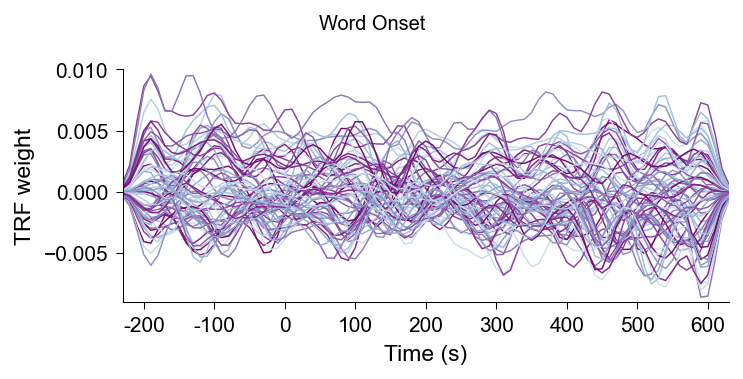

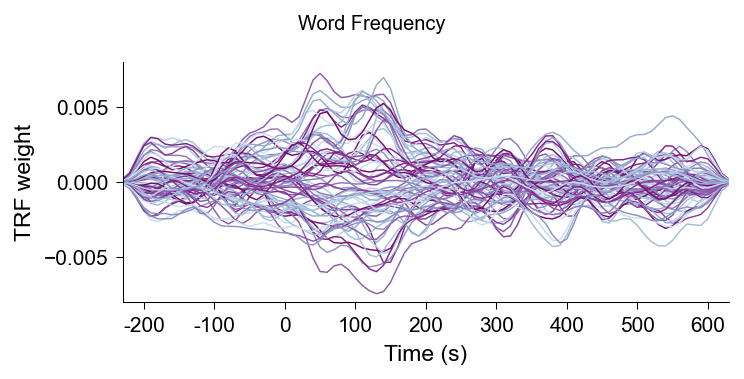

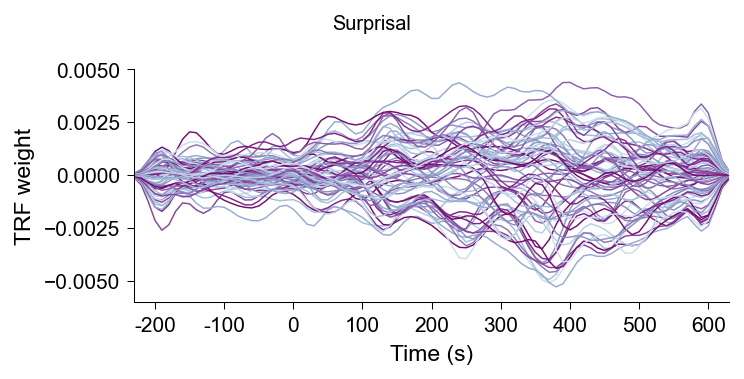

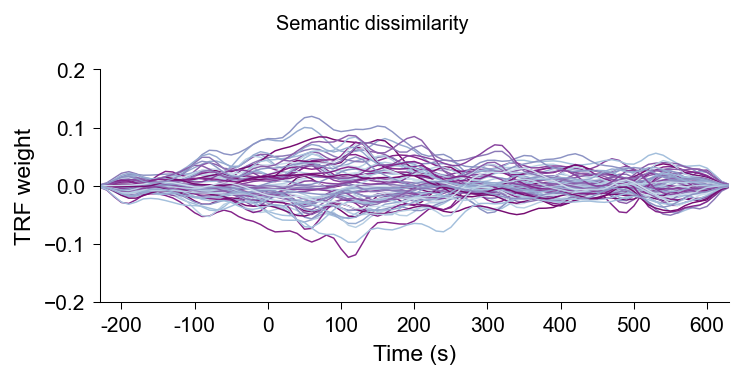

In [43]:
import eelbrain as eel
import matplotlib.pyplot as plt

# global matplotlib style (subtle, thesis-friendly)
plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
})

for name in pred_names:
    h_mean = H[name].mean('case')

    p = eel.plot.Butterfly(
        h_mean,
        title=f'{name}',
         linewidth=0.7, w=5
    )

    plt.xlabel('Time (s)')
    plt.ylabel('TRF weight')
    plt.tight_layout()

    plt.savefig(
    f'butterfly_{name}.png',
    dpi=300,
    bbox_inches='tight'
)


